# Titanic Assignment

## Module Importations

In [1]:
import numpy as np
import os

np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

## Initial Dataframe Stuff

In [2]:
df_train = pd.read_csv('datasets/titanic/train.csv')
df_test = pd.read_csv('datasets/titanic/test.csv')

### Displaying Some Data

In [3]:
print(df_train.info())
df_train.head(n=4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x08E4FC50>]],
      dtype=object)

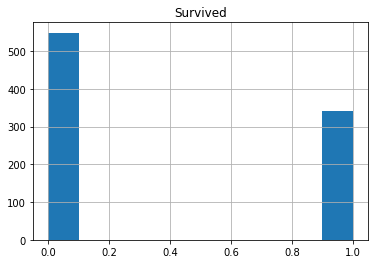

In [4]:
df_train.hist(column='Survived')

#### Need to change some data into usable format for decision tree:

In [5]:
genders = {"male" : 0, "female" : 1}
cities = {"C" : 0, "S" : 1, "Q" : 2}

df_train['Sex'] = df_train['Sex'].map(genders)
df_test['Sex'] = df_test['Sex'].map(genders)

df_train['Embarked'] = df_train['Embarked'].map(cities)
df_test['Embarked'] = df_test['Embarked'].map(cities)


df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,0.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1.0


#### Test set:

In [6]:
print(df_test.info())
df_test.head(n=4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 31.1+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,1


## Tree Attempt

#### Isolating datapoints that are probably important for prediction:

In [7]:
important_stuff = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = df_train[important_stuff].values
Y = df_train['Survived'].values

#### Try prediction based on training set:

In [8]:
classifier = DecisionTreeClassifier()
classifier.fit(X,Y)
y_pred = classifier.predict(X)

print("Accuracy on training:", sum(y_pred==Y)/len(Y))
print("Number of correct predictions: %d out of %d listings" % (sum(y_pred==Y), len(Y)))

Accuracy on training: 0.8170594837261503
Number of correct predictions: 728 out of 891 listings


#### Now make a prediction with test set:

In [9]:
test_x = df_test[important_stuff].values
y_pred = classifier.predict(test_x)

#### Now write predictions to new csv file:

In [10]:
output_file = df_test.copy()
output_file['Survived'] = y_pred

output_file[['PassengerId', 'Survived']].to_csv('datasets/titanic/fpitts.titanic.csv', index=False)

#### First ten rows of output file:

In [11]:
output_file = pd.read_csv('datasets/titanic/fpitts.titanic.csv')
output_file.head(n=10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


#### Histogram of output file:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x09112470>]],
      dtype=object)

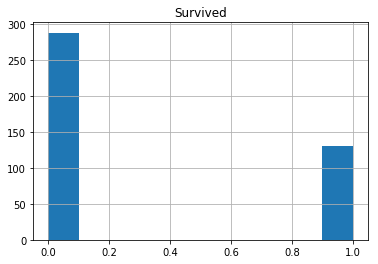

In [12]:
output_file.hist(column='Survived')

## K-Fold Cross Validation Attempt

#### Creating a k-fold object such that k = 10:

In [13]:
k_fold = KFold(n_splits=10, shuffle=True)

#### Now get <i>x</i> and <i>y</i> datapoints from training set and set split iterations for validator:

In [14]:
batch = df_train[important_stuff]
target = df_train['Survived']

x = batch.values
y = target.values
k_fold.get_n_splits(x)

10

#### Now use decision tree to fit data:

In [15]:
classifier = DecisionTreeClassifier()

#### Get score and display:

[0.75555556 0.86516854 0.85393258 0.76404494 0.71910112 0.79775281
 0.78651685 0.66292135 0.73033708 0.84269663]


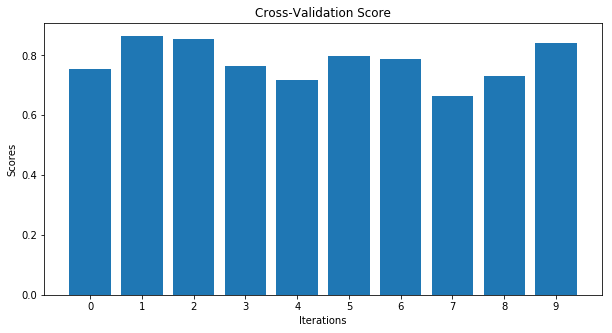

In [16]:
score = cross_val_score(estimator=classifier, X=batch, y=target, cv=k_fold, scoring='accuracy')
print(score)

def plot_bar_x():
    plt.figure(figsize=(10,5))
    index = np.arange(len(score))
    plt.bar(index, score)
    plt.xlabel('Iterations')
    plt.ylabel('Scores')
    plt.xticks(index)
    plt.title('Cross-Validation Score')
    plt.show()
    
plot_bar_x()